In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas import Series, DataFrame
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#packages for machine learning

from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report

In [3]:
#pip install --user pandas_profiling

#### DATASET from https://wildlife.faa.gov/

In [4]:
#importing the Dataset (Jan 01-2020 to Jun 01-2023)
df = pd.read_excel(r"C:\User\Wildlife_Export_6242023\Wildlife_Export_6242023.xlsx")
pd.set_option('display.max_columns', None)
df

,INDX_NR,INCIDENT_DATE,INCIDENT_MONTH,INCIDENT_YEAR,TIME,TIME_OF_DAY,AIRPORT_ID,AIRPORT,LATITUDE,LONGITUDE,RUNWAY,STATE,FAAREGION,LOCATION,ENROUTE_STATE,OPID,OPERATOR,REG,FLT,AIRCRAFT,AMA,AMO,EMA,EMO,AC_CLASS,AC_MASS,TYPE_ENG,NUM_ENGS,ENG_1_POS,ENG_2_POS,ENG_3_POS,ENG_4_POS,PHASE_OF_FLIGHT,HEIGHT,SPEED,DISTANCE,SKY,PRECIPITATION,AOS,COST_REPAIRS,COST_OTHER,COST_REPAIRS_INFL_ADJ,COST_OTHER_INFL_ADJ,INGESTED_OTHER,INDICATED_DAMAGE,DAMAGE_LEVEL,STR_RAD,DAM_RAD,STR_WINDSHLD,DAM_WINDSHLD,STR_NOSE,DAM_NOSE,STR_ENG1,DAM_ENG1,ING_ENG1,STR_ENG2,DAM_ENG2,ING_ENG2,STR_ENG3,DAM_ENG3,ING_ENG3,STR_ENG4,DAM_ENG4,ING_ENG4,STR_PROP,DAM_PROP,STR_WING_ROT,DAM_WING_ROT,STR_FUSE,DAM_FUSE,STR_LG,DAM_LG,STR_TAIL,DAM_TAIL,STR_LGHTS,DAM_LGHTS,STR_OTHER,DAM_OTHER,OTHER_SPECIFY,EFFECT,EFFECT_OTHER,SPECIES_ID,SPECIES,REMARKS,REMAINS_COLLECTED,REMAINS_SENT,BIRD_BAND_NUMBER,WARNED,NUM_SEEN,NUM_STRUCK,SIZE,NR_INJURIES,NR_FATALITIES,COMMENTS,REPORTER_NAME,REPORTER_TITLE,SOURCE,PERSON,LUPDATE,IMAGE,TRANSFER
0,1431042,2023-06-01,6,2023,09:30,Day,ZZZZ,UNKNOWN,NaN,NaN,,NaN,NaN,"3 MILES Spokane, WA",WA,GOV,GOVERNMENT,N793BP,,BELL-407,128,11.0,1.0,1.0,B,2.0,F,1.0,6.0,NaN,NaN,NaN,En Route,2800.0,NaN,NaN,No Cloud,None,NaN,NaN,NaN,NaN,NaN,False,False,N,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,VHF Antenna,None,NaN,UNKBM,Unknown bird - medium,BP reported a possible RTHA strike 3 mile to N...,True,False,NaN,Yes,1,1,Medium,NaN,NaN,NaN,REDACTED,REDACTED,FAA Form 5200-7-E,Airport Operations,2023-06-02,False,False
1,1430734,2023-05-30,5,2023,00:38,NaN,ZZZZ,UNKNOWN,NaN,NaN,,NaN,NaN,FOUND KSDF,NaN,AAL,AMERICAN AIRLINES,N819NN,,B-737-800,148,43.0,10.0,1.0,A,4.0,D,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,N,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,UNKBS,Unknown bird - small,"ASSUME FOUND KSDF. NIGHT. Model 737-823, Engin...",False,False,NaN,Unknown,,1,Small,NaN,NaN,NaN,REDACTED,REDACTED,FAA Form 5200-7-E,Air Transport Operations,2023-06-01,False,False
2,1430681,2023-05-30,5,2023,07:50,NaN,ZZZZ,UNKNOWN,NaN,NaN,,NaN,NaN,FOUND KATL,NaN,FFT,FRONTIER AIRLINES,N341FR,2314,A-320,04A,3.0,10.0,NaN,A,4.0,D,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,N,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,UNKB,Unknown bird,ATCT advised ATL Operations of a wildlife stri...,True,False,NaN,Unknown,,1,NaN,NaN,NaN,NaN,REDACTED,REDACTED,FAA Form 5200-7-E,Airport Operations,2023-06-01,False,False
3,1432055,2023-05-30,5,2023,12:14,Day,KORD,CHICAGO O'HARE INTL ARPT,41.9796,-87.90446,9L,IL,AGL,NaN,NaN,UAL,UNITED AIRLINES,N66837,1732,B-737-900,148,48.0,10.0,1.0,A,4.0,D,2.0,1.0,1.0,NaN,NaN,Descent,11000.0,300.0,35.0,Some Cloud,None,NaN,NaN,NaN,NaN,NaN,False,True,M?,False,False,False,False,True,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,Precautionary Landing,NaN,N6103,Whimbrel,"Strike occurred over Lake Michigan, 35 miles n...",True,True,NaN,Unknown,1,1,Small,NaN,NaN,SI ID,REDACTED,REDACTED,FAA Form 5200-7-E,Airport Operations,2023-06-07,True,False
4,1430524,2023-05-30,5,2023,,Day,KMCO,ORLANDO INTL,28.42889,-81.31603,18R,FL,ASO,NaN,NaN,VOI,VOLARIS,XA-VLP,4980,A-320,04A,3.0,NaN,NaN,A,4.0,D,2.0,1.0,1.0,NaN,NaN,Approach,3000.0,190.0,10.0,Some Cloud,None,24.0,NaN,NaN,NaN,NaN,False,True,M?,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Tru

In [5]:
df.shape

(4722, 101)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4722 entries, 0 to 4721
Columns: 101 entries, INDX_NR to TRANSFER
dtypes: bool(38), float64(20), int64(3), object(40)
memory usage: 2.4+ MB


In [7]:
#unique Values in the dataset 
df.nunique()

INDX_NR           4722
INCIDENT_DATE      149
INCIDENT_MONTH       6
INCIDENT_YEAR        1
TIME              1038
                  ... 
SOURCE               5
PERSON               6
LUPDATE             98
IMAGE                2
TRANSFER             1
Length: 101, dtype: int64

In [8]:
#null values in the dataset 
df.isna().sum()

INDX_NR           0
INCIDENT_DATE     0
INCIDENT_MONTH    0
INCIDENT_YEAR     0
TIME              0
                 ..
SOURCE            0
PERSON            2
LUPDATE           0
IMAGE             0
TRANSFER          0
Length: 101, dtype: int64

In [9]:
list(df.columns)

['INDX_NR',
 'INCIDENT_DATE ',
 'INCIDENT_MONTH',
 'INCIDENT_YEAR',
 'TIME',
 'TIME_OF_DAY',
 'AIRPORT_ID',
 'AIRPORT',
 'LATITUDE',
 'LONGITUDE',
 'RUNWAY',
 'STATE',
 'FAAREGION',
 'LOCATION',
 'ENROUTE_STATE',
 'OPID',
 'OPERATOR',
 'REG',
 'FLT',
 'AIRCRAFT',
 'AMA',
 'AMO',
 'EMA',
 'EMO',
 'AC_CLASS',
 'AC_MASS',
 'TYPE_ENG',
 'NUM_ENGS',
 'ENG_1_POS',
 'ENG_2_POS',
 'ENG_3_POS',
 'ENG_4_POS',
 'PHASE_OF_FLIGHT',
 'HEIGHT',
 'SPEED',
 'DISTANCE',
 'SKY',
 'PRECIPITATION',
 'AOS',
 'COST_REPAIRS',
 'COST_OTHER',
 'COST_REPAIRS_INFL_ADJ',
 'COST_OTHER_INFL_ADJ',
 'INGESTED_OTHER',
 'INDICATED_DAMAGE',
 'DAMAGE_LEVEL',
 'STR_RAD',
 'DAM_RAD',
 'STR_WINDSHLD',
 'DAM_WINDSHLD',
 'STR_NOSE',
 'DAM_NOSE',
 'STR_ENG1',
 'DAM_ENG1',
 'ING_ENG1',
 'STR_ENG2',
 'DAM_ENG2',
 'ING_ENG2',
 'STR_ENG3',
 'DAM_ENG3',
 'ING_ENG3',
 'STR_ENG4',
 'DAM_ENG4',
 'ING_ENG4',
 'STR_PROP',
 'DAM_PROP',
 'STR_WING_ROT',
 'DAM_WING_ROT',
 'STR_FUSE',
 'DAM_FUSE',
 'STR_LG',
 'DAM_LG',
 'STR_TAIL',
 'DAM_TAI

In [10]:
#Calculate summary statistics
summary = df.describe(include=['object'])
summary = summary.transpose()
summary.head()
print(df.describe(include='all'))

,count,unique,top,freq
INCIDENT_DATE,4722,149,2023-05-11,103
TIME,4722,1038,,934
TIME_OF_DAY,2238,4,Day,1152
AIRPORT_ID,4716,489,ZZZZ,871
AIRPORT,4722,495,UNKNOWN,871


             INDX_NR INCIDENT_DATE   INCIDENT_MONTH  INCIDENT_YEAR   TIME  \
count   4.722000e+03           4722     4722.000000         4722.0   4722   
unique           NaN            149             NaN            NaN   1038   
top              NaN     2023-05-11             NaN            NaN          
freq             NaN            103             NaN            NaN    934   
mean    1.422994e+06            NaN        3.540025         2023.0    NaN   
std     1.207697e+04            NaN        1.344412            0.0    NaN   
min     1.353124e+06            NaN        1.000000         2023.0    NaN   
25%     1.412202e+06            NaN        3.000000         2023.0    NaN   
50%     1.428256e+06            NaN        4.000000         2023.0    NaN   
75%     1.432084e+06            NaN        5.000000         2023.0    NaN   
max     1.435247e+06            NaN        6.000000         2023.0    NaN   

       TIME_OF_DAY AIRPORT_ID  AIRPORT  LATITUDE    LONGITUDE RUNWAY STATE 

In [11]:
# Cases by State
count_state = DataFrame({'count' : df.groupby( ['STATE'] ).size()}).reset_index()
count_state.sort_values(['count'], ascending=0).head(10)

# Cases by Aircraft Make/Model
count_air_make = DataFrame({'count' : df.groupby( ['AIRCRAFT'] ).size()}).reset_index()
count_air_make.sort_values(['count'], ascending=0).head(10)

# top 10 bird species - all strikes
count_species = DataFrame({'count' : df.groupby( ['SPECIES'] ).size()}).reset_index()
count_species.sort_values(['count'], ascending=0).head(10)


# number of birds in the strike
count_species = DataFrame({'count' : df.groupby( ['NUM_STRUCK'] ).size()}).reset_index()
count_species.sort_values(['count'], ascending=0).head(10)


# SIZE of the bird
count_species = DataFrame({'count' : df.groupby( ['SIZE'] ).size()}).reset_index()
count_species.sort_values(['count'], ascending=0).head(10)


# Time of the day 
count_species = DataFrame({'count' : df.groupby( ['TIME_OF_DAY'] ).size()}).reset_index()
count_species.sort_values(['count'], ascending=0).head(10)


# type of the sky 
count_species = DataFrame({'count' : df.groupby( ['SKY'] ).size()}).reset_index()
count_species.sort_values(['count'], ascending=0).head(10)


# Month wise analysis
count_species = DataFrame({'count' : df.groupby( ['INCIDENT_MONTH'] ).size()}).reset_index()
count_species.sort_values(['count'], ascending=0).head(12)


,STATE,count
47,TX,490
9,FL,463
4,CA,353
5,CO,217
46,TN,194
35,NY,142
11,GA,137
28,NC,131
15,IL,123
36,OH,105


,AIRCRAFT,count
172,UNKNOWN,1329
25,B-737-800,373
3,A-320,334
4,A-321,288
114,EMB-170,272
24,B-737-8,218
23,B-737-700,171
2,A-319,169
22,B-737-7,145
27,B-737-900,134


,SPECIES,count
310,Unknown bird,878
313,Unknown bird - small,563
164,Horned lark,214
199,Mourning dove,197
312,Unknown bird - medium,196
7,American kestrel,112
110,Eastern meadowlark,106
119,European starling,76
21,Barn swallow,74
170,Killdeer,72


,NUM_STRUCK,count
1,1,4306
3,2-10,364
0,,37
2,11-100,15


,SIZE,count
2,Small,2948
1,Medium,599
0,Large,296


,TIME_OF_DAY,count
1,Day,1152
3,Night,893
2,Dusk,97
0,Dawn,96


,SKY,count
0,No Cloud,1122
2,Some Cloud,661
1,Overcast,394


,INCIDENT_MONTH,count
4,5,1452
3,4,1303
2,3,871
0,1,565
1,2,530
5,6,1


# EDA

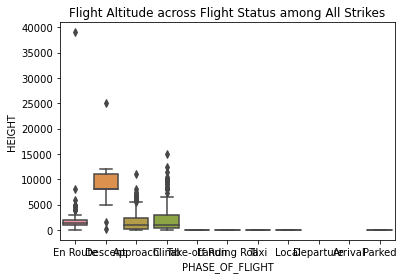

In [12]:
altitude = sns.boxplot(x="PHASE_OF_FLIGHT", y="HEIGHT", data=df)
altitude.set_title('Flight Altitude across Flight Status among All Strikes');

#### we see that maximum bird strikes have happened either during the landing roll, en-route or descend. 

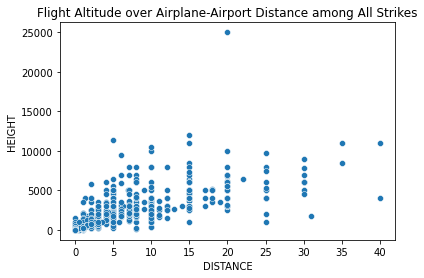

In [13]:
scatter=sns.scatterplot(data=df,x="DISTANCE",y="HEIGHT")
scatter.set_title('Flight Altitude over Airplane-Airport Distance among All Strikes');

#### we see that bird strikes mostly happen either during the takeoff or landing. Majorly it is when the altitude of the aircraft is low, and the distance of the airstrip to the aircraft is also low. Hence, its either take off or landing. 

C:\Users\JOEMON PAULSON\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


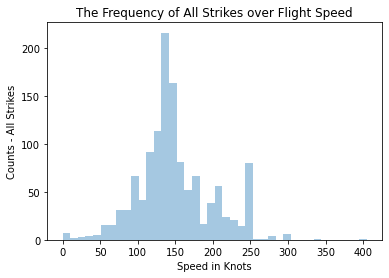

In [14]:
df.loc[df['SPEED'] > 610,'SPEED'] = np.nan
speed = sns.distplot(df['SPEED'].dropna(),kde=False);
speed.set(xlabel='Speed in Knots', ylabel='Counts - All Strikes');
speed.set_title('The Frequency of All Strikes over Flight Speed');

#### The most of the strikes has happened when the aircraft is that a speed of 120 knots to 150 knots. Hence, this tells us that the aircrafts are at lower speed when the strike happens. 

In [15]:
# re-generate count table
count_type_eng = DataFrame({'count' : df.groupby( ['TYPE_ENG'] ).size()}).reset_index()

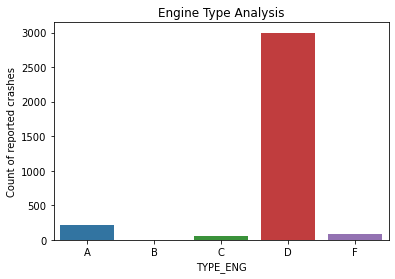

In [16]:
engine=sns.barplot(data=count_type_eng,x="TYPE_ENG",y="count")
engine.set_title('Engine Type Analysis');
engine.set(xlabel='TYPE_ENG', ylabel='Count of reported crashes');

#### A = Piston Engine, B = Turbojet, C = Turboprop, D = Turbofan, E = None (glider), F = Turboshaft (helicopter). 
#### The chart shows Turbofan is heavily hit because major commercial flights have Turbofan Engines. 

# Data Cleaning

In [17]:
df.drop('INDX_NR', axis = 1, inplace = True)

In [18]:
df['TIME_STRIP']=df['TIME'].map(lambda x: str(x)[:2])

def time_of_day(num):
    if num == '' or num == '  ':
        return np.nan
    num = int(num)
    if num > 5 and num < 8:
        return 'dawn'
    elif num > 8 and num < 17:
        return 'day'
    elif num > 17  and num < 20:
        return 'dusk'
    else:
        return 'night'
df['TIME_OF_DAY']=df['TIME_STRIP'].map(lambda x: time_of_day(x.strip().replace(':','')))

In [19]:
df.dtypes

INCIDENT_DATE     object
INCIDENT_MONTH     int64
INCIDENT_YEAR      int64
TIME              object
TIME_OF_DAY       object
                   ...  
PERSON            object
LUPDATE           object
IMAGE               bool
TRANSFER            bool
TIME_STRIP        object
Length: 101, dtype: object

In [20]:
df1 = df[['INDICATED_DAMAGE' ,'INCIDENT_MONTH', 'TIME_OF_DAY', 'STATE', 'AIRCRAFT', 'TYPE_ENG', 'PHASE_OF_FLIGHT', 'HEIGHT', 'SPEED','SKY', 'SIZE', 'NUM_STRUCK']]
df1 = df1.dropna(how='any')
df1['INCIDENT_MONTH'] = pd.to_numeric(df1['INCIDENT_MONTH'], errors='coerce')
df1.isnull().sum()

INDICATED_DAMAGE    0
INCIDENT_MONTH      0
TIME_OF_DAY         0
STATE               0
AIRCRAFT            0
TYPE_ENG            0
PHASE_OF_FLIGHT     0
HEIGHT              0
SPEED               0
SKY                 0
SIZE                0
NUM_STRUCK          0
dtype: int64

<AxesSubplot:>

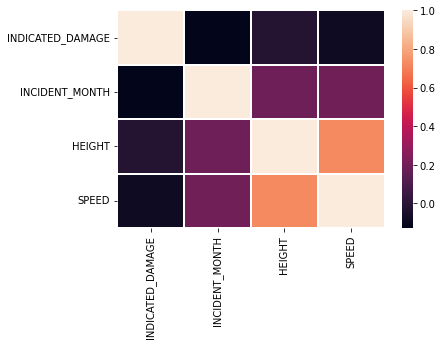

In [21]:
sns.heatmap(df1.corr() , linewidths=2)

In [22]:
# Get all features
features = [column_name for column_name in df1.columns if column_name != 'INDICATED_DAMAGE']

In [23]:
# Get all categorical features
categorical = [column_name for column_name in features if df1[column_name].dtype == 'object']

In [24]:
# Get all numeric columns
numeric = [column_name for column_name in features if column_name not in categorical]

In [25]:
#Print out the features
features

['INCIDENT_MONTH',
 'TIME_OF_DAY',
 'STATE',
 'AIRCRAFT',
 'TYPE_ENG',
 'PHASE_OF_FLIGHT',
 'HEIGHT',
 'SPEED',
 'SKY',
 'SIZE',
 'NUM_STRUCK']

In [26]:
# Print out the catergorical features 
categorical

# Print out the numeric features them out and make sure
numeric

['TIME_OF_DAY',
 'STATE',
 'AIRCRAFT',
 'TYPE_ENG',
 'PHASE_OF_FLIGHT',
 'SKY',
 'SIZE',
 'NUM_STRUCK']

['INCIDENT_MONTH', 'HEIGHT', 'SPEED']

In [27]:
#df1['INDICATED_DAMAGE'].value_counts() / df1.shape[0]

In [28]:
X = df1[features]
X = pd.get_dummies(X, columns = categorical,  drop_first = True)

y = df1['INDICATED_DAMAGE'].replace({True: 1, False:0})

In [29]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split data into train test splits
train_X, test_X, train_Y, test_Y = train_test_split(X, y, test_size = 0.3, random_state=123)

In [30]:
train_X.head()

,INCIDENT_MONTH,HEIGHT,SPEED,TIME_OF_DAY_day,TIME_OF_DAY_dusk,TIME_OF_DAY_night,STATE_AL,STATE_AR,STATE_AZ,STATE_CA,STATE_CO,STATE_CT,STATE_DC,STATE_FL,STATE_FN,STATE_GA,STATE_HI,STATE_IA,STATE_ID,STATE_IL,STATE_IN,STATE_KS,STATE_KY,STATE_LA,STATE_MA,STATE_MD,STATE_ME,STATE_MI,STATE_MN,STATE_MO,STATE_MS,STATE_NC,STATE_ND,STATE_NE,STATE_NJ,STATE_NM,STATE_NV,STATE_NY,STATE_OH,STATE_OK,STATE_OR,STATE_PA,STATE_QC,STATE_RI,STATE_SC,STATE_TN,STATE_TX,STATE_UT,STATE_VA,STATE_WA,STATE_WI,STATE_WY,AIRCRAFT_A-300,AIRCRAFT_A-319,AIRCRAFT_A-320,AIRCRAFT_A-321,AIRCRAFT_A-330,AIRCRAFT_A-350,AIRCRAFT_AEROS 350,AIRCRAFT_ATR-42,AIRCRAFT_B-717-200,AIRCRAFT_B-737-300,AIRCRAFT_B-737-7,AIRCRAFT_B-737-700,AIRCRAFT_B-737-8,AIRCRAFT_B-737-800,AIRCRAFT_B-737-9,AIRCRAFT_B-737-900,AIRCRAFT_B-757-200,AIRCRAFT_B-757-300,AIRCRAFT_B-767-300,AIRCRAFT_B-777,AIRCRAFT_B-777-200,AIRCRAFT_B-787-10,AIRCRAFT_B-787-8,AIRCRAFT_B-787-9,AIRCRAFT_BD-700 GLOBAL EXPRES,AIRCRAFT_BE-100 KING,AIRCRAFT_BE-20,AIRCRAFT_BE-200 KING,AIRCRAFT_BE-300 KING,AIRCRAFT_BE-35,AIRCRAFT_BE-350 SUPER KING,AIRCRAFT_BE-36,AIRCRAFT_BE-400 BJET,AIRCRAFT_BE-90 KING,AIRCRAFT_BE-95,AIRCRAFT_BELL-407,AIRCRAFT_BELL-505,AIRCRAFT_C-152,AIRCRAFT_C-172,AIRCRAFT_C-182,AIRCRAFT_C-525B,AIRCRAFT_C-550,AIRCRAFT_C-700 LONGITUDE,AIRCRAFT_CASA CN-235,AIRCRAFT_CIRRUS SR 20/22,AIRCRAFT_CIRRUS VISION SF50,AIRCRAFT_CITATION,AIRCRAFT_CITATIONJET,AIRCRAFT_CL-215,AIRCRAFT_CL-300,AIRCRAFT_CL-600,AIRCRAFT_CL-601/604,AIRCRAFT_CONVAIR 340,AIRCRAFT_CRJ100/200,AIRCRAFT_CRJ550,AIRCRAFT_CRJ700,AIRCRAFT_CRJ900,AIRCRAFT_DASSAULT FALCON 7X,AIRCRAFT_DASSAULT-900,AIRCRAFT_DHC8 DASH 8,AIRCRAFT_DIAMOND DA20 KATANA,AIRCRAFT_DIAMOND DA40 STAR,AIRCRAFT_DIAMOND DA42 TWIN ST,AIRCRAFT_EC130,AIRCRAFT_EC135,AIRCRAFT_EMB-145,AIRCRAFT_EMB-170,AIRCRAFT_EMB-190,AIRCRAFT_EMB-505 PHENOM 300,AIRCRAFT_GROB 120TP,AIRCRAFT_GUIMBAL CABRI G2,AIRCRAFT_GULFSTREAM G200,AIRCRAFT_GULFSTREAM G280,AIRCRAFT_GULFSTREAM G550,AIRCRAFT_GULFSTREAM G600,AIRCRAFT_GULFSTREAM IV,AIRCRAFT_HONDAJET HA-420,AIRCRAFT_IAI ASTRA JT,AIRCRAFT_LANCAIR LC 40/42,AIRCRAFT_LEARJET-45,AIRCRAFT_MD-11,AIRCRAFT_PA-23 APACHE,AIRCRAFT_PA-28,AIRCRAFT_PA-44 SEMINOLE,AIRCRAFT_PILATUS PC-12,AIRCRAFT_ROBINSON R22,AIRCRAFT_SAAB-340,AIRCRAFT_SOCATA TB9,AIRCRAFT_T-38,AIRCRAFT_T-38N,TYPE_ENG_B,TYPE_ENG_C,TYPE_ENG_D,TYPE_ENG_F,PHASE_OF_FLIGHT_Climb,PHASE_OF_FLIGHT_Descent,PHASE_OF_FLIGHT_Landing Roll,PHASE_OF_FLIGHT_Parked,PHASE_OF_FLIGHT_Take-off Run,PHASE_OF_FLIGHT_Taxi,SKY_Overcast,SKY_Some Cloud,SIZE_Medium,SIZE_Small,NUM_STRUCK_ 1,NUM_STRUCK_ 11-100,NUM_STRUCK_ 2-10
4387,1,0.0,145.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0
1683,4,2000.0,190.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1
373,5,1000.0,126.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0
2629,4,0.0,120.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0
1646,4,100.0,150.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

# NAIVE BAYES

In [31]:
from sklearn.naive_bayes import GaussianNB

In [32]:
gnb=GaussianNB()

In [33]:
gnb.fit(train_X,train_Y)

GaussianNB()

In [34]:
y_pred=gnb.predict(test_X)

In [35]:
accuracy_score(test_Y,y_pred)

0.6143790849673203

In [36]:
from sklearn.metrics import classification_report

In [37]:
print(classification_report(test_Y,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.61      0.74       137
           1       0.16      0.62      0.25        16

    accuracy                           0.61       153
   macro avg       0.55      0.62      0.50       153
weighted avg       0.85      0.61      0.69       153



# Decision Tree

In [58]:
from sklearn import tree

In [59]:
model = tree.DecisionTreeClassifier()

In [60]:
model

DecisionTreeClassifier()

In [61]:
model.fit(train_X,train_Y)

DecisionTreeClassifier()

In [62]:
model.score(test_X,test_Y)

0.869281045751634

# KNN

In [63]:
from sklearn.neighbors import KNeighborsClassifier 

In [64]:
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)  

In [65]:
classifier.fit(train_X, train_Y)

KNeighborsClassifier()

In [66]:
y_pred=classifier.predict(test_X)

In [67]:
accuracy_score(test_Y,y_pred)

0.8823529411764706

In [ ]:
#ACCURACY SCORE
#NAIVE BAYES - 0.6143790849673203
#Decision Tree - 0.869281045751634
#KNN - 0.8823529411764706

# Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
from sklearn.model_selection import GridSearchCV

In [51]:
model =RandomForestClassifier(n_estimators=27)

In [52]:
model

RandomForestClassifier(n_estimators=27)

In [53]:
model.fit(train_X,train_Y)

RandomForestClassifier(n_estimators=27)

In [54]:
y_pred = model.predict(test_X)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [55]:
accuracy_score(y_pred,test_Y)

0.8954248366013072

In [56]:
grid = GridSearchCV(estimator=model,param_grid={'n_estimators':range(1,150)})
grid.fit(train_X,train_Y)
print("The best estimator returned by GridSearchCV is:",grid.best_estimator_)

GridSearchCV(estimator=RandomForestClassifier(n_estimators=27),
             param_grid={'n_estimators': range(1, 150)})

The best estimator returned by GridSearchCV is: RandomForestClassifier(n_estimators=37)
